In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


dataset: https://data.humdata.org/dataset/wfp-food-prices?force_layout=desktop

In [ ]:
data =  pd.read_csv('/content/drive/MyDrive/wfpvam_foodprices.csv')
data

<ipython-input-3-409864c70e2e>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data =  pd.read_csv('/content/drive/MyDrive/Fakultet - Main/Semestri/Semestar 5 - Zimski/4.Data Science/Projects - pay/Data/wfpvam_foodprices.csv')


,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0000,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0000,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0000,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0000,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050633,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,432,Beans (sugar) - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,233.3333,NaN
2050634,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,539,Toothpaste - Retail,0.0,ZWL,15,Retail,116,100 ML,6,2021,112.5000,NaN
2050635,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,540,Laundry soap - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,114.0000,NaN
2050636,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,541,Handwash soap - Retail,0.0,ZWL,15,Retail,66,250 G,6,2021,59.5000,NaN


In [ ]:
def transform(country):
  country_pivot = country.pivot_table(index=['adm0_name', 'mp_year','mp_month'], columns='cm_name', values='mp_price')
  country_pivot = country_pivot.reset_index()
  country_pivot.columns.name = None
  return country_pivot

In [ ]:
def check_candidate(dataset):
  condition = dataset['mp_year'] > 2016
  filtered_dataset = dataset[condition]
  cleaned_df = filtered_dataset.dropna(axis=1)

  if cleaned_df.empty:  # Check if the filtered dataset is empty
        return None


  if len(cleaned_df.columns)>4:
    return cleaned_df
  else:
    return None  # Return None if the condition isn't met

In [ ]:
def convert_to_usd(dataset, exchange_rate):
    # Assuming the first two columns are date columns
    date_columns = dataset.columns[:3]

    usd_prices = {}  # To store the converted prices in USD

    for column in dataset.columns[3:]:
        product = column  # Assuming column name is the product name
        converted_column = dataset[column] * exchange_rate
        usd_prices[product] = converted_column

    # Create a new DataFrame with USD prices
    usd_dataset = pd.DataFrame(dataset[date_columns])
    for product, converted_column in usd_prices.items():
        usd_dataset[product + '_USD'] = converted_column

    return usd_dataset

In [ ]:
def change_date(dataset):
  some_date = dataset['mp_year'].astype(str) + '-' + dataset['mp_month'].astype(str)
  date_in_datetime = pd.to_datetime(some_date, format='%Y-%m')
  dataset['date'] = date_in_datetime
  dataset.drop(columns=['mp_year', 'mp_month'], inplace=True)


In [ ]:
data['cm_name'].unique() #picking products manually
#Bread - Retail
#Rice (low quality) - Retail

array(['Bread - Retail', 'Wheat - Retail', 'Rice (low quality) - Retail',
       'Wage (qualified labour) - Retail',
       'Livestock (sheep, one-year-old alive female) - Retail',
       'Fuel (diesel) - Retail', 'Exchange rate - Retail',
       'Wage (non-qualified labour, non-agricultural) - Retail',
       'Oil (cooking) - Retail', 'Sugar - Retail', 'Pulses - Retail',
       'Wheat flour (high quality) - Retail', 'Salt - Retail',
       'Rice (high quality) - Retail',
       'Wheat flour (low quality) - Retail', 'Wheat flour - Retail',
       'Rice - Retail', 'Beans (white) - Retail', 'Milk - Retail',
       'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail',
       'Lentils - Retail', 'Pasta - Retail', 'Tomatoes - Retail',
       'Oil - Retail', 'Meat (beef) - Retail', 'Cheese (dry) - Retail',
       'Carrots - Retail', 'Onions - Retail', 'Bananas - Retail',
       'Tea - Retail', 'Fuel (petrol-gasoline) - Retail',
       'Fish (canned) - Retail', 'Apples - Retail', '

In [ ]:
data['adm0_name'].unique() #picking countries manually (different continents)

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Bassas da India', 'Belarus', 'Benin',
       'Bhutan', 'Bolivia', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad',
       'China', 'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Democratic Republic of the Congo', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea',
       'Ethiopia', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Indonesia',
       'Iran  (Islamic Republic of)', 'Iraq', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mexico', 'Moldova Republic of', 'Mongolia', 'Mozambique',
       'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria',
  

In [ ]:
grouped = data.groupby('adm0_name') #grouping by country name

In [ ]:
grouped

In [ ]:
datasets = []
for country, group in grouped:
    datasets.append(group.reset_index(drop=True))

In [ ]:
type(datasets)
datasets[1]['adm0_name'][0]

'Algeria'

In [ ]:

def format_datasets(datasets):
    # Extract column sets for each dataset
    column_sets = [set(dataset.columns) for dataset in datasets]

    # Find the common columns (overlapping columns)
    common_columns = set.intersection(*column_sets)

    # Create new datasets with only common columns
    formatted_datasets = []
    for dataset in datasets:
        formatted_dataset = dataset[common_columns].copy()
        formatted_datasets.append(formatted_dataset)

    # Concatenate the formatted datasets
    concatenated_dataset = pd.concat(formatted_datasets, ignore_index=True)

    return concatenated_dataset

# Example usage
dataset1 = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
dataset2 = pd.DataFrame({'B': [7, 8, 9], 'C': [10, 11, 12]})
dataset3 = pd.DataFrame({'B': [13, 14, 15], 'D': [16, 17, 18]})

formatted_dataset = format_datasets([dataset1.copy(), dataset2.copy(), dataset3.copy()])

print("Formatted Dataset:")
print(formatted_dataset)

Formatted Dataset:
    B
0   4
1   5
2   6
3   7
4   8
5   9
6  13
7  14
8  15


<ipython-input-14-373c0512f7bd>:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  formatted_dataset = dataset[common_columns].copy()
<ipython-input-14-373c0512f7bd>:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  formatted_dataset = dataset[common_columns].copy()
<ipython-input-14-373c0512f7bd>:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  formatted_dataset = dataset[common_columns].copy()


In [ ]:
datasets[30] #datasets are grouped by country now

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,77.0,Eritrea,1210,Maekel,2564,Asmara,58,Wheat flour - Retail,0.0,ERN,15,Retail,9,100 KG,4,2007,1800.0,NaN
1,77.0,Eritrea,1210,Maekel,2564,Asmara,58,Wheat flour - Retail,0.0,ERN,15,Retail,9,100 KG,5,2007,1800.0,NaN
2,77.0,Eritrea,1210,Maekel,2564,Asmara,58,Wheat flour - Retail,0.0,ERN,15,Retail,9,100 KG,6,2007,1900.0,NaN
3,77.0,Eritrea,1210,Maekel,2564,Asmara,58,Wheat flour - Retail,0.0,ERN,15,Retail,9,100 KG,7,2007,1800.0,NaN
4,77.0,Eritrea,1210,Maekel,2564,Asmara,58,Wheat flour - Retail,0.0,ERN,15,Retail,9,100 KG,8,2007,2050.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,77.0,Eritrea,1211,Semenawi Keih Bahri,2594,Massawa,65,Sorghum - Retail,0.0,ERN,15,Retail,9,100 KG,10,2008,2600.0,NaN
96,77.0,Eritrea,1211,Semenawi Keih Bahri,2594,Massawa,65,Sorghum - Retail,0.0,ERN,15,Retail,9,100 KG,11,2008,2700.0,NaN
97,77.0,Eritrea,1211,Semenawi Keih Bahri,2594,Massawa,65,Sorghum - Retail,0.0,ERN,15,Retail,9,100 KG,12,2008,3000.0,NaN
98,77.0,Eritrea,1211,Semenawi Keih Bahri,2594,Massawa,65,Sorghum - Retail,0.0,ERN,15,Retail,9,100 KG,1,2009,3000.0,NaN


In [ ]:
final_data_list=[]

In [ ]:
# TESTING

test1=datasets[28]
test1

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,40765.0,Egypt,0,NaN,226,National Average,52,Rice - Retail,0.0,EGP,15,Retail,5,KG,8,2010,3.9794,NaN
1,40765.0,Egypt,0,NaN,226,National Average,52,Rice - Retail,0.0,EGP,15,Retail,5,KG,9,2010,3.9175,NaN
2,40765.0,Egypt,0,NaN,226,National Average,52,Rice - Retail,0.0,EGP,15,Retail,5,KG,10,2010,3.9389,NaN
3,40765.0,Egypt,0,NaN,226,National Average,52,Rice - Retail,0.0,EGP,15,Retail,5,KG,11,2010,3.8437,NaN
4,40765.0,Egypt,0,NaN,226,National Average,52,Rice - Retail,0.0,EGP,15,Retail,5,KG,12,2010,3.8954,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,40765.0,Egypt,0,NaN,226,National Average,468,"Meat (beef, without bones) - Retail",0.0,EGP,15,Retail,5,KG,2,2021,133.2900,NaN
2300,40765.0,Egypt,0,NaN,226,National Average,468,"Meat (beef, without bones) - Retail",0.0,EGP,15,Retail,5,KG,3,2021,133.3700,NaN
2301,40765.0,Egypt,0,NaN,226,National Average,468,"Meat (beef, without bones) - Retail",0.0,EGP,15,Retail,5,KG,4,2021,133.8700,NaN
2302,40765.0,Egypt,0,NaN,226,National Average,468,"Meat (beef, without bones) - Retail",0.0,EGP,15,Retail,5,KG,5,2021,133.9800,NaN


In [ ]:
# TESTING
test1=transform(test1)
test1


,adm0_name,mp_year,mp_month,"Beans (fava, dry) - Retail",Cheese (picon) - Retail,Cheese - Retail,Eggs - Retail,Fish (tilapia) - Retail,Garlic - Retail,Ghee (artificial) - Retail,...,Oil (mixed) - Retail,Oil (sunflower) - Retail,Onions (red) - Retail,Onions (white) - Retail,Pasta - Retail,Potatoes - Retail,Rice - Retail,Sugar - Retail,Tomatoes - Retail,Wheat flour - Retail
0,Egypt,2010,8,5.7616,NaN,NaN,NaN,NaN,11.2558,9.8247,...,NaN,NaN,1.6983,1.8640,4.6974,1.8087,3.9794,4.2820,2.2029,3.4398
1,Egypt,2010,9,5.9484,NaN,NaN,NaN,NaN,11.9137,9.8565,...,NaN,NaN,1.9597,1.9641,5.0463,1.9863,3.9175,4.3750,3.5628,4.0653
2,Egypt,2010,10,6.2798,NaN,NaN,NaN,NaN,13.0104,9.9752,...,NaN,NaN,2.1130,2.1776,5.0298,1.9558,3.9389,4.6318,7.4096,4.0858
3,Egypt,2010,11,6.6172,NaN,NaN,NaN,NaN,13.1003,9.9909,...,NaN,NaN,2.2340,2.3627,5.0309,1.9737,3.8437,4.8235,4.4166,4.0225
4,Egypt,2010,12,6.8969,NaN,NaN,NaN,NaN,12.9368,10.2249,...,NaN,NaN,2.6451,2.6471,5.0314,1.5297,3.8954,6.1859,1.9162,3.9505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Egypt,2021,2,30.0100,9.84,27.77,1.60,NaN,34.9200,NaN,...,20.99,25.44,6.0200,NaN,8.6400,3.2700,9.4900,13.9700,3.4900,7.6000
125,Egypt,2021,3,29.2800,9.83,27.89,1.60,NaN,29.6900,NaN,...,21.53,26.56,6.0700,NaN,8.7400,3.8900,9.5100,13.9200,3.6200,7.6600
126,Egypt,2021,4,28.5100,9.83,28.21,1.60,NaN,30.7900,NaN,...,21.81,26.99,6.0600,NaN,8.7400,4.3300,9.5100,13.9200,4.1900,7.6600
127,Egypt,2021,5,28.0800,9.83,28.29,1.60,NaN,32.6800,NaN,...,21.81,26.99,5.4400,NaN,8.7900,4.9600,9.5100,13.9200,5.3400,7.6600


In [ ]:
# TESTING
condition = test1['mp_year'] > 2016
filtered_test1 = test1[condition]
cleaned_df = filtered_test1.dropna(axis=1)
cleaned_df

,adm0_name,mp_year,mp_month,"Beans (fava, dry) - Retail",Cheese (picon) - Retail,Cheese - Retail,Eggs - Retail,Garlic - Retail,Ghee (natural) - Retail,Lentils - Retail,...,Oil (maize) - Retail,Oil (mixed) - Retail,Oil (sunflower) - Retail,Onions (red) - Retail,Pasta - Retail,Potatoes - Retail,Rice - Retail,Sugar - Retail,Tomatoes - Retail,Wheat flour - Retail
75,Egypt,2017,1,17.25,6.52,20.75,1.37,19.50,85.00,21.65,...,27.15,20.50,23.50,8.25,7.59,6.25,7.55,14.50,4.25,6.93
76,Egypt,2017,2,17.25,7.02,23.75,1.43,22.50,90.00,21.65,...,27.15,20.50,23.50,8.75,7.59,6.00,7.55,14.50,4.75,6.93
77,Egypt,2017,3,17.25,7.02,23.75,1.38,22.50,90.00,21.65,...,27.15,20.50,23.50,9.75,7.59,6.50,7.05,12.50,7.25,6.93
78,Egypt,2017,4,17.25,7.02,23.75,1.38,22.50,85.00,21.65,...,27.15,20.50,23.50,9.75,7.59,7.10,7.05,12.50,9.00,6.93
79,Egypt,2017,5,16.75,7.02,23.75,1.40,25.50,85.00,21.65,...,27.15,20.50,23.50,6.00,7.59,4.75,7.05,14.50,6.75,6.93
80,Egypt,2017,6,16.75,7.02,23.75,1.65,28.50,85.00,21.65,...,27.15,20.50,23.50,5.50,7.59,4.50,7.30,14.50,4.50,6.93
81,Egypt,2017,7,16.75,7.02,24.75,1.71,28.50,90.00,21.65,...,27.15,20.50,23.50,5.00,7.59,4.50,7.80,14.50,4.50,6.93
82,Egypt,2017,8,16.75,7.02,24.75,1.71,28.50,97.00,21.65,...,27.15,20.50,23.50,5.00,7.59,5.10,7.80,14.50,5.50,6.93
83,Egypt,2017,9,16.75,7.02,24.75,1.71,28.50,97.00,21.65,...,27.15,20.50,23.50,5.35,7.59,4.75,7.80,14.50,6.50,6.93
84,Egypt,2017,10,17.75,8.00,26.00,1.66,28.50,97.00,21.65,...,27.15,20.50,23.50,5.35,7.59,5.25,7.80,14.00,7.00,6.93


In [ ]:
len(cleaned_df.columns)

22

In [ ]:
dataset_candidates={}

type(datasets[0]['adm0_name'][0])

str

In [ ]:
for dataset in datasets:
  dataset_name=dataset['adm0_name'][0]
  transformed_dataset=transform(dataset)

  result = check_candidate(transformed_dataset)

  if result is not None:
    dataset_candidates[dataset_name]=result

In [ ]:
len(dataset_candidates)

71

In [ ]:
dataset_candidates.keys() ## od tuka odbirame koi drzhavi sakame da gi imame vo nashiot model so tsfresh
#

dict_keys(['Afghanistan', 'Angola', 'Argentina', 'Armenia', 'Bassas da India', 'Belarus', 'Benin', 'Bolivia', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'China', 'Colombia', 'Congo', "Cote d'Ivoire", 'Democratic Republic of the Congo', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Honduras', 'Indonesia', 'Iran  (Islamic Republic of)', 'Iraq', 'Japan', 'Jordan', 'Kazakhstan', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Lebanon', 'Lesotho', 'Liberia', 'Mali', 'Mauritania', 'Moldova Republic of', 'Mongolia', 'Mozambique', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Rwanda', 'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'Sri Lanka', 'State of Palestine', 'Swaziland', 'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Togo', 'Turkey', 'Uganda', 'Ukraine', 'United Republic of Tanzania', 'Zambia'])

In [ ]:
dataset_candidates["Afghanistan"]

,adm0_name,mp_year,mp_month,Bread - Retail,Exchange rate - Retail,Fuel (diesel) - Retail,Rice (low quality) - Retail,"Wage (non-qualified labour, non-agricultural) - Retail",Wage (qualified labour) - Retail,Wheat - Retail
204,Afghanistan,2017,1,44.577500,66.725313,41.937500,41.800000,300.000000,668.750000,23.443750
205,Afghanistan,2017,2,44.577500,67.237500,41.125000,42.571875,300.000000,657.812500,23.503125
206,Afghanistan,2017,3,44.577500,67.759375,42.625000,43.300000,304.687500,662.500000,23.693750
207,Afghanistan,2017,4,44.527500,67.454688,42.500000,44.090625,306.250000,675.000000,23.543750
208,Afghanistan,2017,5,44.577500,67.839062,42.781250,44.456250,325.000000,690.625000,23.615625
209,Afghanistan,2017,6,44.577500,68.053125,42.906250,45.250000,332.812500,696.875000,23.843750
210,Afghanistan,2017,7,44.390000,68.244062,42.531250,45.121875,342.187500,718.750000,23.539062
211,Afghanistan,2017,8,44.327500,68.489063,42.893750,45.287500,334.375000,723.437500,23.360937
212,Afghanistan,2017,9,44.327500,68.435937,44.312500,45.187500,326.562500,712.500000,23.253125
213,Afghanistan,2017,10,44.327500,68.210938,45.718750,44.762500,332.812500,703.125000,23.368750


In [ ]:
dataset_candidates["Egypt"]

,adm0_name,mp_year,mp_month,"Beans (fava, dry) - Retail",Cheese (picon) - Retail,Cheese - Retail,Eggs - Retail,Garlic - Retail,Ghee (natural) - Retail,Lentils - Retail,...,Oil (maize) - Retail,Oil (mixed) - Retail,Oil (sunflower) - Retail,Onions (red) - Retail,Pasta - Retail,Potatoes - Retail,Rice - Retail,Sugar - Retail,Tomatoes - Retail,Wheat flour - Retail
75,Egypt,2017,1,17.25,6.52,20.75,1.37,19.50,85.00,21.65,...,27.15,20.50,23.50,8.25,7.59,6.25,7.55,14.50,4.25,6.93
76,Egypt,2017,2,17.25,7.02,23.75,1.43,22.50,90.00,21.65,...,27.15,20.50,23.50,8.75,7.59,6.00,7.55,14.50,4.75,6.93
77,Egypt,2017,3,17.25,7.02,23.75,1.38,22.50,90.00,21.65,...,27.15,20.50,23.50,9.75,7.59,6.50,7.05,12.50,7.25,6.93
78,Egypt,2017,4,17.25,7.02,23.75,1.38,22.50,85.00,21.65,...,27.15,20.50,23.50,9.75,7.59,7.10,7.05,12.50,9.00,6.93
79,Egypt,2017,5,16.75,7.02,23.75,1.40,25.50,85.00,21.65,...,27.15,20.50,23.50,6.00,7.59,4.75,7.05,14.50,6.75,6.93
80,Egypt,2017,6,16.75,7.02,23.75,1.65,28.50,85.00,21.65,...,27.15,20.50,23.50,5.50,7.59,4.50,7.30,14.50,4.50,6.93
81,Egypt,2017,7,16.75,7.02,24.75,1.71,28.50,90.00,21.65,...,27.15,20.50,23.50,5.00,7.59,4.50,7.80,14.50,4.50,6.93
82,Egypt,2017,8,16.75,7.02,24.75,1.71,28.50,97.00,21.65,...,27.15,20.50,23.50,5.00,7.59,5.10,7.80,14.50,5.50,6.93
83,Egypt,2017,9,16.75,7.02,24.75,1.71,28.50,97.00,21.65,...,27.15,20.50,23.50,5.35,7.59,4.75,7.80,14.50,6.50,6.93
84,Egypt,2017,10,17.75,8.00,26.00,1.66,28.50,97.00,21.65,...,27.15,20.50,23.50,5.35,7.59,5.25,7.80,14.00,7.00,6.93


In [ ]:

column_counts = {}  # To store column counts for each dataset

# Iterate through each dataset in the dictionary
for dataset_name, dataset in dataset_candidates.items():
    column_counts[dataset_name] = {}  # Initialize a dictionary for the current dataset

    # Iterate through columns in the current dataset
    for column_name in dataset.columns:
        # Count how many other dataset_candidates have the same column name
        count = sum(1 for other_dataset in dataset_candidates.values() if column_name in other_dataset.columns)
        column_counts[dataset_name][column_name] = count

# Print the column counts for each dataset
for dataset_name, counts in column_counts.items():
    print(f"\n Columns in {dataset_name}:")
    for column_name, count in counts.items():
        print(f"{column_name}: {count}")


 Columns in Afghanistan:
adm0_name: 71
mp_year: 71
mp_month: 71
Bread - Retail: 9
Exchange rate - Retail: 2
Fuel (diesel) - Retail: 9
Rice (low quality) - Retail: 1
Wage (non-qualified labour, non-agricultural) - Retail: 2
Wage (qualified labour) - Retail: 1
Wheat - Retail: 4

 Columns in Angola:
adm0_name: 71
mp_year: 71
mp_month: 71
Bread - Retail: 9
Cassava flour - Retail: 4
Maize flour - Retail: 2
Milk (powder) - Retail: 5
Oil (palm) - Retail: 12
Oil (soybean) - Retail: 2
Rice (regular, milled) - Retail: 1
Sugar (white) - Retail: 2

 Columns in Argentina:
adm0_name: 71
mp_year: 71
mp_month: 71
Maize (yellow) - Wholesale: 5
Wheat - Wholesale: 3

 Columns in Armenia:
adm0_name: 71
mp_year: 71
mp_month: 71
Apples (red) - Retail: 4
Bread (first grade flour) - Retail: 1
Bread (high grade flour) - Retail: 2
Cabbage - Retail: 6
Carrots - Retail: 2
Cheese (dry) - Retail: 1
Cucumbers (greenhouse) - Retail: 2
Eggs - Retail: 15
Fish (fresh) - Retail: 3
Fuel (diesel) - Retail: 9
Fuel (petrol-

In [ ]:
# kje gi zememe slednite produkti:


# Rice (imported) - Retail

# Wheat flour - Retail

# Sugar - Retail

#Meat (beef) - Retail



In [ ]:
#kje gi zememe slednite drzhavi:
# Armenia - eggs, meat sugar
# Gambia - eggs, meat , sugar
#indonesia - eggs, meat, sugar
#Egypt - Eggs, Sugar, wheat, potatos
#Turkey - eggs, sugar, wheat, potatos


dataset_candidates['Armenia']



,adm0_name,mp_year,mp_month,Apples (red) - Retail,Bread (first grade flour) - Retail,Bread (high grade flour) - Retail,Cabbage - Retail,Carrots - Retail,Cheese (dry) - Retail,Cucumbers (greenhouse) - Retail,...,Meat (pork) - Retail,Milk - Retail,Oil (vegetable) - Retail,Onions - Retail,Pasta - Retail,Potatoes - Retail,Rice (white) - Retail,Sugar - Retail,Tomatoes - Retail,Wheat flour - Retail
190,Armenia,2017,1,618.000000,404.000000,429.000000,163.500000,266.000000,1844.000000,1321.000000,...,2420.000000,459.000000,783.000000,260.000000,473.000000,163.500000,489.000000,415.000000,1182.000000,226.100000
191,Armenia,2017,2,588.000000,411.000000,414.000000,157.500000,245.000000,1894.000000,1196.000000,...,2510.000000,452.000000,801.000000,268.000000,399.000000,162.000000,475.000000,410.000000,1063.000000,228.500000
192,Armenia,2017,3,512.000000,401.000000,423.000000,168.000000,248.000000,1874.000000,1035.000000,...,2450.000000,445.000000,802.000000,250.000000,427.000000,194.000000,464.000000,408.000000,943.500000,229.000000
193,Armenia,2017,4,512.000000,410.000000,414.000000,168.000000,248.000000,1874.000000,1035.000000,...,2450.000000,445.000000,802.000000,250.000000,427.000000,194.000000,464.000000,408.000000,943.500000,229.000000
194,Armenia,2017,5,797.000000,401.000000,415.000000,220.000000,320.000000,1890.000000,407.000000,...,2490.000000,453.000000,763.000000,284.000000,382.000000,313.500000,448.000000,413.000000,910.000000,242.000000
195,Armenia,2017,7,638.000000,398.000000,429.000000,124.000000,246.000000,1825.000000,187.000000,...,3000.000000,436.000000,765.000000,272.000000,407.000000,167.000000,437.000000,463.000000,265.000000,230.000000
196,Armenia,2017,9,570.000000,402.000000,424.000000,112.000000,222.000000,1845.000000,345.000000,...,3300.000000,429.000000,733.000000,244.000000,394.000000,165.000000,451.000000,463.000000,275.000000,229.000000
197,Armenia,2017,10,540.000000,397.000000,424.000000,147.000000,264.000000,1865.000000,508.000000,...,3500.000000,436.000000,728.000000,248.000000,369.000000,168.000000,415.000000,498.000000,460.000000,238.500000
198,Armenia,2017,11,493.000000,416.000000,465.000000,182.000000,298.000000,1991.000000,815.000000,...,3380.000000,409.000000,739.000000,245.000000,334.000000,188.000000,432.000000,435.500000,835.000000,225.500000
199,Armenia,2017,12,567.000000,419.000000,470.000000,194.000000,307.000000,1885.000000,1000.000000,...,3350.000000,399.000000,745.800000,259.000000,346.000000,196.000000,449.000000,439.000000,1105.000000,225.500000


In [ ]:
dataset_candidates['Indonesia']

,adm0_name,mp_year,mp_month,Chili (bird's eye) - Retail,Chili (red) - Retail,Eggs - Retail,Meat (beef) - Retail,"Meat (chicken, broiler) - Retail",Oil (vegetable) - Retail,Rice - Retail,Sugar - Retail
120,Indonesia,2017,1,78947.000000,47172.000000,20590.000000,107199.000000,39906.000000,14349.000000,13222.000000,14628.000000
121,Indonesia,2017,2,89763.000000,44464.000000,19703.000000,106877.000000,37480.000000,14567.000000,13202.000000,14546.000000
122,Indonesia,2017,3,73252.041281,35804.747664,20260.300679,113818.662315,30241.672247,13860.231479,10958.926900,15005.099244
123,Indonesia,2017,4,60335.000000,34429.000000,19008.000000,106329.000000,37777.000000,14546.000000,13074.000000,13791.000000
124,Indonesia,2017,5,52636.000000,34973.000000,20515.000000,107647.000000,39133.000000,14610.000000,13096.000000,13402.000000
125,Indonesia,2017,6,44893.000000,31731.000000,20439.000000,108734.000000,40123.000000,14629.000000,13125.000000,13306.000000
126,Indonesia,2017,8,37208.000000,31008.000000,21375.000000,108072.000000,39868.000000,14575.000000,13095.000000,13160.000000
127,Indonesia,2017,9,33472.000000,31433.000000,20811.000000,107715.000000,39031.000000,14588.000000,13215.000000,13034.000000
128,Indonesia,2017,10,31340.000000,33190.000000,20395.000000,106713.000000,37856.000000,14595.000000,13346.000000,12910.000000
129,Indonesia,2017,11,30870.000000,36144.000000,20772.000000,106201.000000,38132.000000,14542.000000,13429.000000,12814.000000


In [ ]:
dataset_candidates['Gambia']

,adm0_name,mp_year,mp_month,Apples (red) - Retail,Bananas - Retail,Beans (dry) - Retail,Bread - Retail,Cabbage - Retail,Coffee (instant) - Retail,Eggs - Retail,...,Oranges (big size) - Retail,Potatoes (Irish) - Retail,"Rice (basmati, broken) - Retail","Rice (long grain, imported) - Retail","Rice (medium grain, imported) - Retail","Rice (paddy, long grain, local) - Retail","Rice (small grain, imported) - Retail",Sugar - Retail,Tea - Retail,Tomatoes - Retail
113,Gambia,2017,1,86.410250,24.083333,29.409100,46.963257,48.364675,126.250000,7.812500,...,55.128160,44.500000,110.000000,30.142857,24.375000,23.493425,36.877200,33.499950,49.500000,26.875000
114,Gambia,2017,2,104.798514,31.239400,29.409100,32.626029,48.364675,97.500000,6.571429,...,25.312500,45.125000,105.000000,30.800000,26.282900,22.875000,25.875000,33.333300,49.500000,26.562500
115,Gambia,2017,3,104.285714,24.500000,29.250000,31.750000,47.750000,176.250000,6.375000,...,26.000000,45.000000,117.333333,29.428571,25.500000,22.000000,24.750000,32.750000,49.750000,25.750000
116,Gambia,2017,4,104.798514,25.312500,29.409100,33.151400,48.364675,89.375000,8.093750,...,26.333300,44.625000,123.250000,30.125000,26.875000,22.000000,25.285714,33.499975,49.750000,26.562500
117,Gambia,2017,5,100.042700,24.502325,29.159100,33.443571,47.883900,89.375000,6.625000,...,26.333300,42.279750,133.333333,29.714286,27.000000,23.437500,25.500000,33.666625,48.875000,27.187500
118,Gambia,2017,6,104.798514,25.312500,29.409100,32.827450,48.364675,103.750000,6.750000,...,26.333300,44.625000,130.000000,30.428571,27.375000,24.500000,24.769725,33.666625,50.875000,27.812500
119,Gambia,2017,7,104.798514,25.758925,29.909100,33.365425,49.302175,90.625000,6.375000,...,25.399960,44.625000,121.666667,29.714286,27.625000,24.125000,25.142857,33.999975,51.250000,27.187500
120,Gambia,2017,8,104.798514,25.758925,29.909100,33.365425,49.302175,90.625000,6.375000,...,25.399960,44.625000,121.666667,29.714286,27.625000,24.125000,25.142857,33.999975,51.250000,27.187500
121,Gambia,2017,9,110.838875,27.770650,30.075775,34.711100,51.250000,91.875000,6.500000,...,25.158720,45.000000,120.000000,30.353371,27.671050,23.750000,25.250000,32.166700,51.250000,31.879375
122,Gambia,2017,10,112.922200,27.770650,30.075775,37.458700,51.250000,96.250000,6.500000,...,25.158720,45.000000,120.500000,30.500000,27.250000,23.625000,26.000000,32.333350,51.250000,31.879375


In [ ]:
dataset_candidates['Turkey']

,adm0_name,mp_year,mp_month,Apples - Retail,Bananas - Retail,Bread (common) - Retail,Bulgur - Retail,Cheese - Retail,Chickpeas - Retail,Cocoa (powder) - Retail,...,Salt - Retail,Sugar - Retail,Tea (herbal) - Retail,Tea - Retail,Tomatoes (paste) - Retail,Tomatoes - Retail,Water - Retail,Wheat flour - Retail,Yogurt - Retail,Zucchini - Retail
39,Turkey,2017,1,2.587367,5.936950,3.964700,3.146075,21.253750,12.243050,41.019375,...,1.844625,4.228750,4.819200,25.184125,6.057675,3.622100,5.206500,3.013025,4.325150,6.589167
40,Turkey,2017,2,2.684367,6.410575,3.969700,3.167150,22.001725,12.863350,41.198300,...,1.912625,4.236275,4.613133,25.730450,5.947225,2.853725,5.318433,2.997375,4.464750,5.707000
41,Turkey,2017,3,2.963367,7.343700,3.988500,3.194400,21.758175,13.456975,41.158450,...,1.939075,4.235775,4.743233,25.894775,5.844800,2.636175,5.359667,2.994775,4.507100,4.549633
42,Turkey,2017,4,3.356167,8.670200,4.128400,3.293533,24.287433,14.101333,43.197500,...,1.994800,4.194033,4.863367,26.337500,5.899700,4.392000,5.395467,3.138733,4.620200,2.472000
43,Turkey,2017,5,3.676800,8.769367,4.219767,3.301167,24.374167,14.038100,44.264467,...,2.037033,4.208200,4.879767,26.614500,5.898800,3.850900,5.432100,3.192533,4.577133,2.077333
44,Turkey,2017,6,4.036100,8.189900,4.213867,3.315500,24.254600,13.846833,44.517133,...,2.040033,4.162300,5.056567,26.687367,5.775333,2.212633,5.447267,3.204033,4.550067,2.283500
45,Turkey,2017,7,4.537400,7.451867,4.224400,3.274800,24.484633,13.871167,45.039000,...,2.046100,4.274233,4.981900,27.350900,5.712633,2.227067,5.515633,3.175800,4.650767,2.309033
46,Turkey,2017,8,3.848300,7.452567,4.218833,3.302200,25.245267,13.519467,43.606267,...,2.043000,4.292233,4.970033,27.883900,5.775033,1.977333,5.534400,3.201333,4.950667,2.253167
47,Turkey,2017,9,3.266200,7.409100,4.202800,3.341467,25.560333,13.494000,44.211133,...,2.042300,4.308067,5.148533,28.410033,5.669733,2.290333,5.556467,3.200000,4.985733,2.304667
48,Turkey,2017,10,2.898800,6.998600,4.325233,3.388800,26.736933,13.512433,44.171000,...,2.045833,4.339500,5.220900,28.919533,5.760667,2.501133,5.574767,3.188467,5.348900,3.108733


In [ ]:
dataset_candidates['Egypt']

,adm0_name,mp_year,mp_month,"Beans (fava, dry) - Retail",Cheese (picon) - Retail,Cheese - Retail,Eggs - Retail,Garlic - Retail,Ghee (natural) - Retail,Lentils - Retail,...,Oil (maize) - Retail,Oil (mixed) - Retail,Oil (sunflower) - Retail,Onions (red) - Retail,Pasta - Retail,Potatoes - Retail,Rice - Retail,Sugar - Retail,Tomatoes - Retail,Wheat flour - Retail
75,Egypt,2017,1,17.25,6.52,20.75,1.37,19.50,85.00,21.65,...,27.15,20.50,23.50,8.25,7.59,6.25,7.55,14.50,4.25,6.93
76,Egypt,2017,2,17.25,7.02,23.75,1.43,22.50,90.00,21.65,...,27.15,20.50,23.50,8.75,7.59,6.00,7.55,14.50,4.75,6.93
77,Egypt,2017,3,17.25,7.02,23.75,1.38,22.50,90.00,21.65,...,27.15,20.50,23.50,9.75,7.59,6.50,7.05,12.50,7.25,6.93
78,Egypt,2017,4,17.25,7.02,23.75,1.38,22.50,85.00,21.65,...,27.15,20.50,23.50,9.75,7.59,7.10,7.05,12.50,9.00,6.93
79,Egypt,2017,5,16.75,7.02,23.75,1.40,25.50,85.00,21.65,...,27.15,20.50,23.50,6.00,7.59,4.75,7.05,14.50,6.75,6.93
80,Egypt,2017,6,16.75,7.02,23.75,1.65,28.50,85.00,21.65,...,27.15,20.50,23.50,5.50,7.59,4.50,7.30,14.50,4.50,6.93
81,Egypt,2017,7,16.75,7.02,24.75,1.71,28.50,90.00,21.65,...,27.15,20.50,23.50,5.00,7.59,4.50,7.80,14.50,4.50,6.93
82,Egypt,2017,8,16.75,7.02,24.75,1.71,28.50,97.00,21.65,...,27.15,20.50,23.50,5.00,7.59,5.10,7.80,14.50,5.50,6.93
83,Egypt,2017,9,16.75,7.02,24.75,1.71,28.50,97.00,21.65,...,27.15,20.50,23.50,5.35,7.59,4.75,7.80,14.50,6.50,6.93
84,Egypt,2017,10,17.75,8.00,26.00,1.66,28.50,97.00,21.65,...,27.15,20.50,23.50,5.35,7.59,5.25,7.80,14.00,7.00,6.93


In [ ]:
# Da doznaam kolku mutual koloni imaat site 5

#Kolku mutual imaat prvi 3 / posledni 2

#proverka dali e ista valutata otkako kje bide napraveni finalnite columns

In [ ]:


# Example usage
exchange_rate = 0.85  # Example exchange rate (for demonstration)
usd_dataset_egypt = convert_to_usd(dataset_candidates['Egypt'], 0.032)
usd_dataset_turkey = convert_to_usd(dataset_candidates['Turkey'], 0.037)
usd_dataset_gambia = convert_to_usd(dataset_candidates['Gambia'], 0.017)
usd_dataset_indonesia = convert_to_usd(dataset_candidates['Indonesia'], 0.000066)
usd_dataset_armenia = convert_to_usd(dataset_candidates['Armenia'], 0.0026)

datasets=[]
datasets.append(usd_dataset_egypt)
datasets.append(usd_dataset_turkey)
datasets.append(usd_dataset_gambia)
datasets.append(usd_dataset_indonesia)
datasets.append(usd_dataset_armenia)

datasets



[    adm0_name  mp_year  mp_month  Beans (fava, dry) - Retail_USD  \
 75      Egypt     2017         1                         0.55200   
 76      Egypt     2017         2                         0.55200   
 77      Egypt     2017         3                         0.55200   
 78      Egypt     2017         4                         0.55200   
 79      Egypt     2017         5                         0.53600   
 80      Egypt     2017         6                         0.53600   
 81      Egypt     2017         7                         0.53600   
 82      Egypt     2017         8                         0.53600   
 83      Egypt     2017         9                         0.53600   
 84      Egypt     2017        10                         0.56800   
 85      Egypt     2017        11                         0.56800   
 86      Egypt     2017        12                         0.56800   
 87      Egypt     2018         1                         0.56800   
 88      Egypt     2018         2 

In [ ]:
for dataset in datasets:
  change_date(dataset)

In [ ]:
datasets

[    adm0_name  Beans (fava, dry) - Retail_USD  Cheese (picon) - Retail_USD  \
 75      Egypt                         0.55200                      0.20864   
 76      Egypt                         0.55200                      0.22464   
 77      Egypt                         0.55200                      0.22464   
 78      Egypt                         0.55200                      0.22464   
 79      Egypt                         0.53600                      0.22464   
 80      Egypt                         0.53600                      0.22464   
 81      Egypt                         0.53600                      0.22464   
 82      Egypt                         0.53600                      0.22464   
 83      Egypt                         0.53600                      0.22464   
 84      Egypt                         0.56800                      0.25600   
 85      Egypt                         0.56800                      0.25600   
 86      Egypt                         0.56800      

In [ ]:
usd_dataset_turkey

,adm0_name,Apples - Retail_USD,Bananas - Retail_USD,Bread (common) - Retail_USD,Bulgur - Retail_USD,Cheese - Retail_USD,Chickpeas - Retail_USD,Cocoa (powder) - Retail_USD,Coffee - Retail_USD,Cucumbers - Retail_USD,...,Sugar - Retail_USD,Tea (herbal) - Retail_USD,Tea - Retail_USD,Tomatoes (paste) - Retail_USD,Tomatoes - Retail_USD,Water - Retail_USD,Wheat flour - Retail_USD,Yogurt - Retail_USD,Zucchini - Retail_USD,date
39,Turkey,0.095733,0.219667,0.146694,0.116405,0.786389,0.452993,1.517717,1.461494,0.180944,...,0.156464,0.178310,0.931813,0.224134,0.134018,0.192640,0.111482,0.160031,0.243799,2017-01-01
40,Turkey,0.099322,0.237191,0.146879,0.117185,0.814064,0.475944,1.524337,1.477060,0.204221,...,0.156742,0.170686,0.952027,0.220047,0.105588,0.196782,0.110903,0.165196,0.211159,2017-02-01
41,Turkey,0.109645,0.271717,0.147574,0.118193,0.805052,0.497908,1.522863,1.462662,0.184845,...,0.156724,0.175500,0.958107,0.216258,0.097538,0.198308,0.110807,0.166763,0.168336,2017-03-01
42,Turkey,0.124178,0.320797,0.152751,0.121861,0.898635,0.521749,1.598307,1.576207,0.095879,...,0.155179,0.179945,0.974488,0.218289,0.162504,0.199632,0.116133,0.170947,0.091464,2017-04-01
43,Turkey,0.136042,0.324467,0.156131,0.122143,0.901844,0.519410,1.637785,1.601605,0.060451,...,0.155703,0.180551,0.984737,0.218256,0.142483,0.200988,0.118124,0.169354,0.076861,2017-05-01
44,Turkey,0.149336,0.303026,0.155913,0.122674,0.897420,0.512333,1.647134,1.600510,0.064995,...,0.154005,0.187093,0.987433,0.213687,0.081867,0.201549,0.118549,0.168352,0.084489,2017-06-01
45,Turkey,0.167884,0.275719,0.156303,0.121168,0.905931,0.513233,1.666443,1.624370,0.067083,...,0.158147,0.184330,1.011983,0.211367,0.082401,0.204078,0.117505,0.172078,0.085434,2017-07-01
46,Turkey,0.142387,0.275745,0.156097,0.122181,0.934075,0.500220,1.613432,1.621474,0.068274,...,0.158813,0.183891,1.031704,0.213676,0.073161,0.204773,0.118449,0.183175,0.083367,2017-08-01
47,Turkey,0.120849,0.274137,0.155504,0.123634,0.945732,0.499278,1.635812,1.594239,0.067207,...,0.159398,0.190496,1.051171,0.209780,0.084742,0.205589,0.118400,0.184472,0.085273,2017-09-01
48,Turkey,0.107256,0.258948,0.160034,0.125386,0.989267,0.499960,1.634327,1.595923,0.085401,...,0.160561,0.193173,1.070023,0.213145,0.092542,0.206266,0.117973,0.197909,0.115023,2017-10-01


In [ ]:
#овде се средуваат сите да имаат заеднички колони
common_columns = set(usd_dataset_egypt.columns).intersection(usd_dataset_turkey.columns)
common_columns1 = set(usd_dataset_indonesia.columns).intersection(usd_dataset_armenia.columns).intersection(usd_dataset_gambia.columns)
#print("Common columns:", common_columns)
common_columns
common_columns1

{'Eggs - Retail_USD',
 'Meat (beef) - Retail_USD',
 'Oil (vegetable) - Retail_USD',
 'Sugar - Retail_USD',
 'adm0_name',
 'date'}

In [ ]:
datasets = [usd_dataset_egypt, usd_dataset_turkey]
datasets1 = [ usd_dataset_indonesia,usd_dataset_armenia, usd_dataset_gambia]

common_columns = set(datasets[0].columns)
common_columns1 = set(datasets1[0].columns)

for dataset in datasets[1:]:
    common_columns = common_columns.intersection(dataset.columns)

for dataset1 in datasets1[1:]:
    common_columns1 = common_columns1.intersection(dataset1.columns)

print("Common columns:", common_columns)

print("Common columns 1:", common_columns1)



Common columns: {'Garlic - Retail_USD', 'Pasta - Retail_USD', 'Sugar - Retail_USD', 'Cheese - Retail_USD', 'Rice - Retail_USD', 'Tomatoes - Retail_USD', 'date', 'Potatoes - Retail_USD', 'Lentils - Retail_USD', 'Eggs - Retail_USD', 'Wheat flour - Retail_USD', 'Oil (sunflower) - Retail_USD', 'adm0_name'}
Common columns 1: {'adm0_name', 'date', 'Oil (vegetable) - Retail_USD', 'Eggs - Retail_USD', 'Meat (beef) - Retail_USD', 'Sugar - Retail_USD'}


In [ ]:
datasets[0]

,adm0_name,"Beans (fava, dry) - Retail_USD",Cheese (picon) - Retail_USD,Cheese - Retail_USD,Eggs - Retail_USD,Garlic - Retail_USD,Ghee (natural) - Retail_USD,Lentils - Retail_USD,"Meat (beef, without bones) - Retail_USD","Meat (chicken, frozen) - Retail_USD",...,Oil (mixed) - Retail_USD,Oil (sunflower) - Retail_USD,Onions (red) - Retail_USD,Pasta - Retail_USD,Potatoes - Retail_USD,Rice - Retail_USD,Sugar - Retail_USD,Tomatoes - Retail_USD,Wheat flour - Retail_USD,date
75,Egypt,0.55200,0.20864,0.66400,0.04384,0.62400,2.72000,0.69280,3.80800,0.99200,...,0.65600,0.75200,0.26400,0.24288,0.20000,0.24160,0.46400,0.13600,0.22176,2017-01-01
76,Egypt,0.55200,0.22464,0.76000,0.04576,0.72000,2.88000,0.69280,3.90400,1.12000,...,0.65600,0.75200,0.28000,0.24288,0.19200,0.24160,0.46400,0.15200,0.22176,2017-02-01
77,Egypt,0.55200,0.22464,0.76000,0.04416,0.72000,2.88000,0.69280,4.06400,1.15200,...,0.65600,0.75200,0.31200,0.24288,0.20800,0.22560,0.40000,0.23200,0.22176,2017-03-01
78,Egypt,0.55200,0.22464,0.76000,0.04416,0.72000,2.72000,0.69280,4.22400,1.15200,...,0.65600,0.75200,0.31200,0.24288,0.22720,0.22560,0.40000,0.28800,0.22176,2017-04-01
79,Egypt,0.53600,0.22464,0.76000,0.04480,0.81600,2.72000,0.69280,4.38400,1.21600,...,0.65600,0.75200,0.19200,0.24288,0.15200,0.22560,0.46400,0.21600,0.22176,2017-05-01
80,Egypt,0.53600,0.22464,0.76000,0.05280,0.91200,2.72000,0.69280,4.51200,1.18400,...,0.65600,0.75200,0.17600,0.24288,0.14400,0.23360,0.46400,0.14400,0.22176,2017-06-01
81,Egypt,0.53600,0.22464,0.79200,0.05472,0.91200,2.88000,0.69280,4.67200,1.08800,...,0.65600,0.75200,0.16000,0.24288,0.14400,0.24960,0.46400,0.14400,0.22176,2017-07-01
82,Egypt,0.53600,0.22464,0.79200,0.05472,0.91200,3.10400,0.69280,4.80000,1.05600,...,0.65600,0.75200,0.16000,0.24288,0.16320,0.24960,0.46400,0.17600,0.22176,2017-08-01
83,Egypt,0.53600,0.22464,0.79200,0.05472,0.91200,3.10400,0.69280,4.80000,0.99200,...,0.65600,0.75200,0.17120,0.24288,0.15200,0.24960,0.46400,0.20800,0.22176,2017-09-01
84,Egypt,0.56800,0.25600,0.83200,0.05312,0.91200,3.10400,0.69280,4.80000,0.92800,...,0.65600,0.75200,0.17120,0.24288,0.16800,0.24960,0.44800,0.22400,0.22176,2017-10-01


In [ ]:
#TSFRESH INSTALLING AND USING
!pip install tsfresh
#se pusta for, vo kojshto gi iterira 3 od 5 datasets(pravi kombinacii nekolku pati) i na sekoja iteracija/kombinacija pravi:
#1. gi stava site zaednicki koloni (drugite gi dropnuva) na izbranite 3 mnozestva vo taa iteracija.
#2. koga kje ostanat identicni koloni za site 3 datasets potoa gi spojuva vo 1 dataset kako vo tsfresh -> id = country, time = time X id, other columns = products X id
#3. otkako kje se spojat se pusta  u tsfresh i vadime/ printame: RESULTS -- text print: FROM COUNTRIES (print ime na countries)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 8.0 MB/s eta 0:00:00


In [ ]:
formatted_test=format_datasets([usd_dataset_armenia.copy(),usd_dataset_indonesia.copy(),usd_dataset_gambia.copy()])
formatted_test2=format_datasets([usd_dataset_turkey.copy(),usd_dataset_egypt.copy()])

print("Formatted Dataset:")


Formatted Dataset:


<ipython-input-14-373c0512f7bd>:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  formatted_dataset = dataset[common_columns].copy()
<ipython-input-14-373c0512f7bd>:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  formatted_dataset = dataset[common_columns].copy()
<ipython-input-14-373c0512f7bd>:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  formatted_dataset = dataset[common_columns].copy()
<ipython-input-14-373c0512f7bd>:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  formatted_dataset = dataset[common_columns].copy()
<ipython-input-14-373c0512f7bd>:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  formatted_dataset = dataset[common_column

In [ ]:
formatted_test



,Sugar - Retail_USD,date,Oil (vegetable) - Retail_USD,Eggs - Retail_USD,Meat (beef) - Retail_USD,adm0_name
0,1.079000,2017-01-01,2.035800,0.184600,6.266000,Armenia
1,1.066000,2017-02-01,2.082600,0.191620,6.448000,Armenia
2,1.060800,2017-03-01,2.085200,0.186160,6.370000,Armenia
3,1.060800,2017-04-01,2.085200,0.186160,6.370000,Armenia
4,1.073800,2017-05-01,1.983800,0.173680,6.344000,Armenia
...,...,...,...,...,...,...
144,0.613821,2021-02-01,1.245149,0.147738,3.495119,Gambia
145,0.639524,2021-03-01,1.467768,0.148548,3.526488,Gambia
146,0.618679,2021-04-01,1.387321,0.150976,3.510298,Gambia
147,0.623536,2021-05-01,1.467768,0.141667,3.526488,Gambia


In [ ]:
formatted_test2

,Garlic - Retail_USD,Pasta - Retail_USD,Sugar - Retail_USD,Cheese - Retail_USD,Rice - Retail_USD,date,Tomatoes - Retail_USD,adm0_name,Potatoes - Retail_USD,Lentils - Retail_USD,Eggs - Retail_USD,Wheat flour - Retail_USD,Oil (sunflower) - Retail_USD
0,0.609679,0.113695,0.156464,0.786389,0.236249,2017-01-01,0.134018,Turkey,0.055440,0.286748,0.019604,0.111482,0.293664
1,0.614031,0.114490,0.156742,0.814064,0.244123,2017-02-01,0.105588,Turkey,0.055992,0.290824,0.019872,0.110903,0.299486
2,0.637110,0.114933,0.156724,0.805052,0.255319,2017-03-01,0.097538,Turkey,0.055400,0.295653,0.018707,0.110807,0.302579
3,0.692625,0.116799,0.155179,0.898635,0.264374,2017-04-01,0.162504,Turkey,0.078910,0.305270,0.016649,0.116133,0.303052
4,0.541288,0.117186,0.155703,0.901844,0.267019,2017-05-01,0.142483,Turkey,0.074851,0.301148,0.015943,0.118124,0.303574
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1.117440,0.276480,0.447040,0.888640,0.303680,2021-02-01,0.111680,Egypt,0.104640,0.597760,0.051200,0.243200,0.814080
104,0.950080,0.279680,0.445440,0.892480,0.304320,2021-03-01,0.115840,Egypt,0.124480,0.598720,0.051200,0.245120,0.849920
105,0.985280,0.279680,0.445440,0.902720,0.304320,2021-04-01,0.134080,Egypt,0.138560,0.597440,0.051200,0.245120,0.863680
106,1.045760,0.281280,0.445440,0.905280,0.304320,2021-05-01,0.170880,Egypt,0.158720,0.597120,0.051200,0.245120,0.863680


In [ ]:
import tsfresh as ts

returned = ts.extract_features(formatted_test,column_id="adm0_name", column_sort="date", column_kind=None, column_value=None)
returned2 = ts.extract_features(formatted_test2,column_id="adm0_name", column_sort="date", column_kind=None, column_value=None)

Feature Extraction: 100%|██████████| 22/22 [00:05<00:00,  4.17it/s]


In [ ]:
returned


,Sugar - Retail_USD__variance_larger_than_standard_deviation,Sugar - Retail_USD__has_duplicate_max,Sugar - Retail_USD__has_duplicate_min,Sugar - Retail_USD__has_duplicate,Sugar - Retail_USD__sum_values,Sugar - Retail_USD__abs_energy,Sugar - Retail_USD__mean_abs_change,Sugar - Retail_USD__mean_change,Sugar - Retail_USD__mean_second_derivative_central,Sugar - Retail_USD__median,...,Meat (beef) - Retail_USD__fourier_entropy__bins_5,Meat (beef) - Retail_USD__fourier_entropy__bins_10,Meat (beef) - Retail_USD__fourier_entropy__bins_100,Meat (beef) - Retail_USD__permutation_entropy__dimension_3__tau_1,Meat (beef) - Retail_USD__permutation_entropy__dimension_4__tau_1,Meat (beef) - Retail_USD__permutation_entropy__dimension_5__tau_1,Meat (beef) - Retail_USD__permutation_entropy__dimension_6__tau_1,Meat (beef) - Retail_USD__permutation_entropy__dimension_7__tau_1,Meat (beef) - Retail_USD__query_similarity_count__query_None__threshold_0.0,Meat (beef) - Retail_USD__mean_n_absolute_max__number_of_maxima_7
Armenia,0.0,0.0,0.0,1.0,46.244039,42.485183,0.027268,0.000015,0.000155,0.821945,...,0.315396,0.655142,1.101756,1.588412,2.416354,3.073803,3.503430,3.708094,NaN,7.948617
Gambia,0.0,0.0,1.0,1.0,31.183349,19.243020,0.048063,0.001071,0.000034,0.572510,...,1.520321,1.912769,3.039116,1.651099,2.721547,3.443017,3.702669,3.756993,NaN,4.208223
Indonesia,0.0,0.0,0.0,0.0,39.712251,35.454602,0.020668,-0.000743,-0.000074,0.832788,...,0.355713,0.530510,1.288017,1.761885,2.837745,3.464126,3.654222,3.663562,NaN,7.761083


In [ ]:
returned2

,Garlic - Retail_USD__variance_larger_than_standard_deviation,Garlic - Retail_USD__has_duplicate_max,Garlic - Retail_USD__has_duplicate_min,Garlic - Retail_USD__has_duplicate,Garlic - Retail_USD__sum_values,Garlic - Retail_USD__abs_energy,Garlic - Retail_USD__mean_abs_change,Garlic - Retail_USD__mean_change,Garlic - Retail_USD__mean_second_derivative_central,Garlic - Retail_USD__median,...,Oil (sunflower) - Retail_USD__fourier_entropy__bins_5,Oil (sunflower) - Retail_USD__fourier_entropy__bins_10,Oil (sunflower) - Retail_USD__fourier_entropy__bins_100,Oil (sunflower) - Retail_USD__permutation_entropy__dimension_3__tau_1,Oil (sunflower) - Retail_USD__permutation_entropy__dimension_4__tau_1,Oil (sunflower) - Retail_USD__permutation_entropy__dimension_5__tau_1,Oil (sunflower) - Retail_USD__permutation_entropy__dimension_6__tau_1,Oil (sunflower) - Retail_USD__permutation_entropy__dimension_7__tau_1,Oil (sunflower) - Retail_USD__query_similarity_count__query_None__threshold_0.0,Oil (sunflower) - Retail_USD__mean_n_absolute_max__number_of_maxima_7
Egypt,0.0,0.0,0.0,1.0,38.146240,29.601317,0.052281,0.007553,-0.001129,0.709760,...,0.458208,0.785820,2.496110,0.324508,0.491459,0.689203,0.891049,1.096918,NaN,0.835063
Turkey,0.0,0.0,0.0,0.0,47.388228,52.718063,0.136348,0.002151,-0.002628,0.728441,...,0.306829,0.306829,0.903528,1.145550,1.680642,2.209737,2.569670,2.869629,NaN,0.648911


In [ ]:
all_column_names = returned.columns.tolist()

# Display all column names
for column_name in all_column_names:
    print(column_name)

Sugar - Retail_USD__variance_larger_than_standard_deviation
Sugar - Retail_USD__has_duplicate_max
Sugar - Retail_USD__has_duplicate_min
Sugar - Retail_USD__has_duplicate
Sugar - Retail_USD__sum_values
Sugar - Retail_USD__abs_energy
Sugar - Retail_USD__mean_abs_change
Sugar - Retail_USD__mean_change
Sugar - Retail_USD__mean_second_derivative_central
Sugar - Retail_USD__median
Sugar - Retail_USD__mean
Sugar - Retail_USD__length
Sugar - Retail_USD__standard_deviation
Sugar - Retail_USD__variation_coefficient
Sugar - Retail_USD__variance
Sugar - Retail_USD__skewness
Sugar - Retail_USD__kurtosis
Sugar - Retail_USD__root_mean_square
Sugar - Retail_USD__absolute_sum_of_changes
Sugar - Retail_USD__longest_strike_below_mean
Sugar - Retail_USD__longest_strike_above_mean
Sugar - Retail_USD__count_above_mean
Sugar - Retail_USD__count_below_mean
Sugar - Retail_USD__last_location_of_maximum
Sugar - Retail_USD__first_location_of_maximum
Sugar - Retail_USD__last_location_of_minimum
Sugar - Retail_USD_

In [ ]:
all_column_names2 = returned2.columns.tolist()

# Display all column names
for column_name in all_column_names2:
    print(column_name)

Streaming output truncated to the last 5000 lines.
Rice - Retail_USD__fft_coefficient__attr_"abs"__coeff_16
Rice - Retail_USD__fft_coefficient__attr_"abs"__coeff_17
Rice - Retail_USD__fft_coefficient__attr_"abs"__coeff_18
Rice - Retail_USD__fft_coefficient__attr_"abs"__coeff_19
Rice - Retail_USD__fft_coefficient__attr_"abs"__coeff_20
Rice - Retail_USD__fft_coefficient__attr_"abs"__coeff_21
Rice - Retail_USD__fft_coefficient__attr_"abs"__coeff_22
Rice - Retail_USD__fft_coefficient__attr_"abs"__coeff_23
Rice - Retail_USD__fft_coefficient__attr_"abs"__coeff_24
Rice - Retail_USD__fft_coefficient__attr_"abs"__coeff_25
Rice - Retail_USD__fft_coefficient__attr_"abs"__coeff_26
Rice - Retail_USD__fft_coefficient__attr_"abs"__coeff_27
Rice - Retail_USD__fft_coefficient__attr_"abs"__coeff_28
Rice - Retail_USD__fft_coefficient__attr_"abs"__coeff_29
Rice - Retail_USD__fft_coefficient__attr_"abs"__coeff_30
Rice - Retail_USD__fft_coefficient__attr_"abs"__coeff_31
Rice - Retail_USD__fft_coefficient__a

In [ ]:
#agg_autocorrelation(x, param)
#query_similarity_count

In [ ]:
# Select specific columns you want to include in the new dataset
selected_columns = ['Sugar - Retail_USD__agg_autocorrelation__f_agg_"mean"__maxlag_40',
'Sugar - Retail_USD__agg_autocorrelation__f_agg_"median"__maxlag_40',
'Sugar - Retail_USD__agg_autocorrelation__f_agg_"var"__maxlag_40',


'Meat (beef) - Retail_USD__agg_autocorrelation__f_agg_"mean"__maxlag_40',
'Meat (beef) - Retail_USD__agg_autocorrelation__f_agg_"median"__maxlag_40',
'Meat (beef) - Retail_USD__agg_autocorrelation__f_agg_"var"__maxlag_40',

'Eggs - Retail_USD__agg_autocorrelation__f_agg_"mean"__maxlag_40',
'Eggs - Retail_USD__agg_autocorrelation__f_agg_"median"__maxlag_40',
'Eggs - Retail_USD__agg_autocorrelation__f_agg_"var"__maxlag_40',

'Oil (vegetable) - Retail_USD__agg_autocorrelation__f_agg_"mean"__maxlag_40',
'Oil (vegetable) - Retail_USD__agg_autocorrelation__f_agg_"median"__maxlag_40',
'Oil (vegetable) - Retail_USD__agg_autocorrelation__f_agg_"var"__maxlag_40'
]

# Create a new dataset with the selected columns
new_df = returned[selected_columns]
new_df

,"Sugar - Retail_USD__agg_autocorrelation__f_agg_""mean""__maxlag_40","Sugar - Retail_USD__agg_autocorrelation__f_agg_""median""__maxlag_40","Sugar - Retail_USD__agg_autocorrelation__f_agg_""var""__maxlag_40","Meat (beef) - Retail_USD__agg_autocorrelation__f_agg_""mean""__maxlag_40","Meat (beef) - Retail_USD__agg_autocorrelation__f_agg_""median""__maxlag_40","Meat (beef) - Retail_USD__agg_autocorrelation__f_agg_""var""__maxlag_40","Eggs - Retail_USD__agg_autocorrelation__f_agg_""mean""__maxlag_40","Eggs - Retail_USD__agg_autocorrelation__f_agg_""median""__maxlag_40","Eggs - Retail_USD__agg_autocorrelation__f_agg_""var""__maxlag_40","Oil (vegetable) - Retail_USD__agg_autocorrelation__f_agg_""mean""__maxlag_40","Oil (vegetable) - Retail_USD__agg_autocorrelation__f_agg_""median""__maxlag_40","Oil (vegetable) - Retail_USD__agg_autocorrelation__f_agg_""var""__maxlag_40"
Armenia,-0.215710,-0.282386,0.315360,-0.114459,-0.184663,0.083979,-0.043100,-0.057656,0.053681,-0.109712,-0.188635,0.087039
Gambia,-0.021588,-0.044051,0.008254,-0.085774,-0.024332,0.081795,-0.137272,-0.247740,0.178200,-0.053108,-0.068184,0.047583
Indonesia,-0.026438,-0.203311,0.253437,-0.243389,-0.334989,0.262008,-0.314852,-0.080996,0.533095,-0.358971,-0.485445,0.568685


In [ ]:
# Select specific columns you want to include in the new dataset
selected_columns2 = ['Rice - Retail_USD__agg_autocorrelation__f_agg_"mean"__maxlag_40',
'Rice - Retail_USD__agg_autocorrelation__f_agg_"median"__maxlag_40',
'Rice - Retail_USD__agg_autocorrelation__f_agg_"var"__maxlag_40',

'Potatoes - Retail_USD__agg_autocorrelation__f_agg_"mean"__maxlag_40',
'Potatoes - Retail_USD__agg_autocorrelation__f_agg_"median"__maxlag_40',
'Potatoes - Retail_USD__agg_autocorrelation__f_agg_"var"__maxlag_40',

'Wheat flour - Retail_USD__agg_autocorrelation__f_agg_"mean"__maxlag_40',
'Wheat flour - Retail_USD__agg_autocorrelation__f_agg_"median"__maxlag_40',
'Wheat flour - Retail_USD__agg_autocorrelation__f_agg_"var"__maxlag_40',

'Pasta - Retail_USD__agg_autocorrelation__f_agg_"mean"__maxlag_40',
'Pasta - Retail_USD__agg_autocorrelation__f_agg_"median"__maxlag_40',
'Pasta - Retail_USD__agg_autocorrelation__f_agg_"var"__maxlag_40',
]

# Create a new dataset with the selected columns
new_df2 = returned2[selected_columns2]
new_df2

,"Rice - Retail_USD__agg_autocorrelation__f_agg_""mean""__maxlag_40","Rice - Retail_USD__agg_autocorrelation__f_agg_""median""__maxlag_40","Rice - Retail_USD__agg_autocorrelation__f_agg_""var""__maxlag_40","Potatoes - Retail_USD__agg_autocorrelation__f_agg_""mean""__maxlag_40","Potatoes - Retail_USD__agg_autocorrelation__f_agg_""median""__maxlag_40","Potatoes - Retail_USD__agg_autocorrelation__f_agg_""var""__maxlag_40","Wheat flour - Retail_USD__agg_autocorrelation__f_agg_""mean""__maxlag_40","Wheat flour - Retail_USD__agg_autocorrelation__f_agg_""median""__maxlag_40","Wheat flour - Retail_USD__agg_autocorrelation__f_agg_""var""__maxlag_40","Pasta - Retail_USD__agg_autocorrelation__f_agg_""mean""__maxlag_40","Pasta - Retail_USD__agg_autocorrelation__f_agg_""median""__maxlag_40","Pasta - Retail_USD__agg_autocorrelation__f_agg_""var""__maxlag_40"
Egypt,-0.134792,-0.354764,0.238424,-0.131059,-0.180503,0.157042,0.008517,0.123922,0.151981,-0.134944,0.005997,0.460352
Turkey,-0.092383,-0.031512,0.422539,-0.026050,-0.020718,0.002515,-0.132985,-0.130183,0.460484,-0.174822,-0.133432,0.623447


In [ ]:
!pip install networkx[default]


In [ ]:
!pip install networkx


In [ ]:
import networkx as nx
G = nx.Graph()

In [ ]:
new_df.index

Index(['Armenia', 'Gambia', 'Indonesia'], dtype='object')

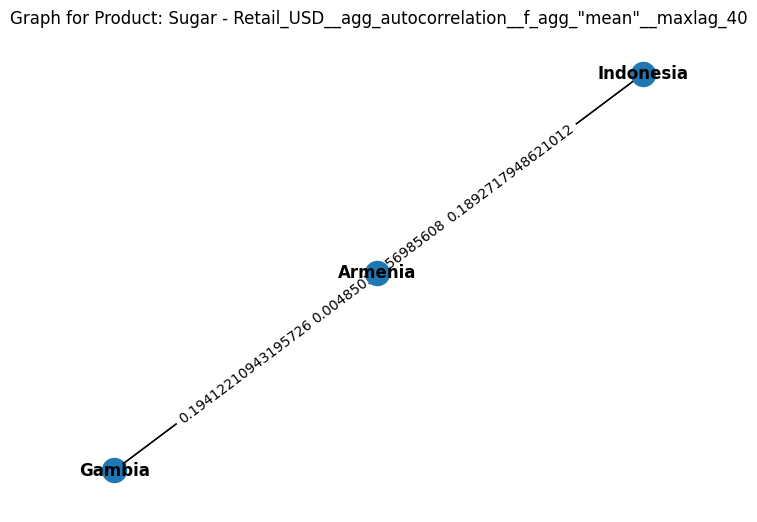

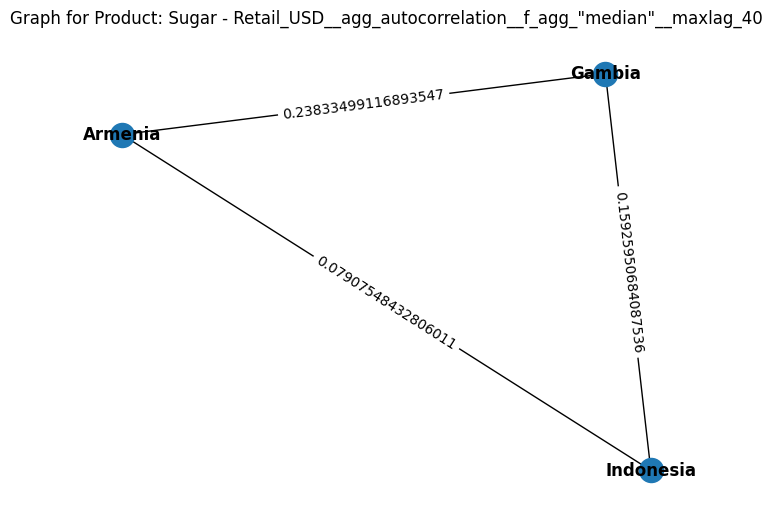

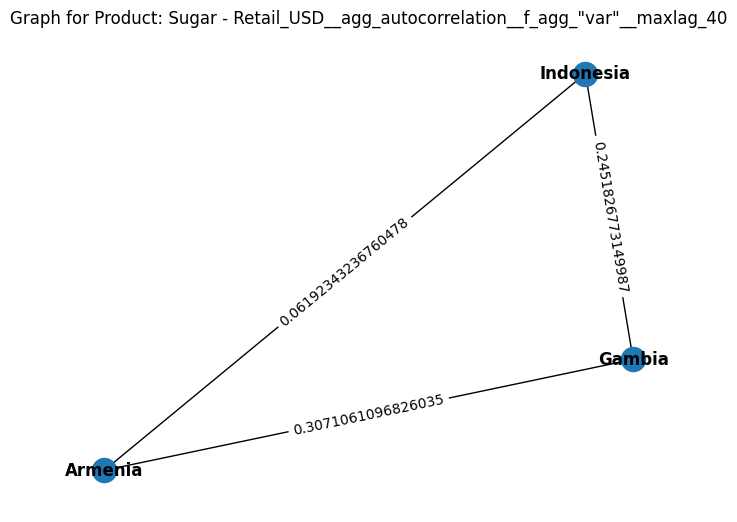

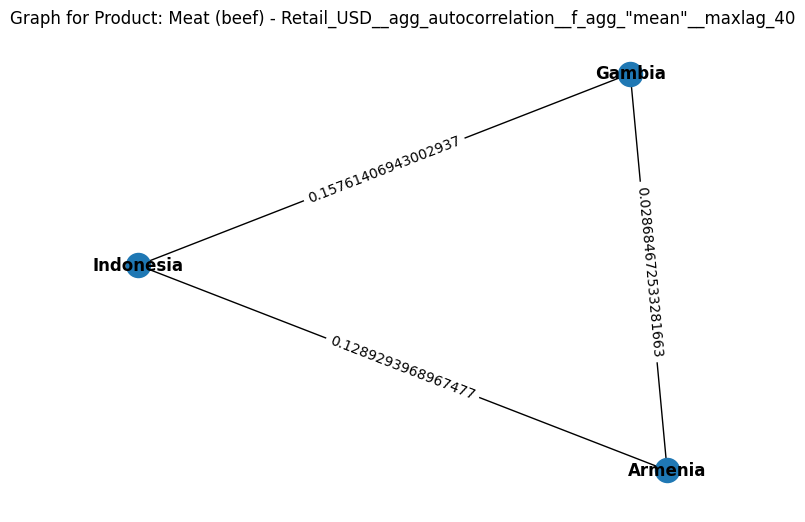

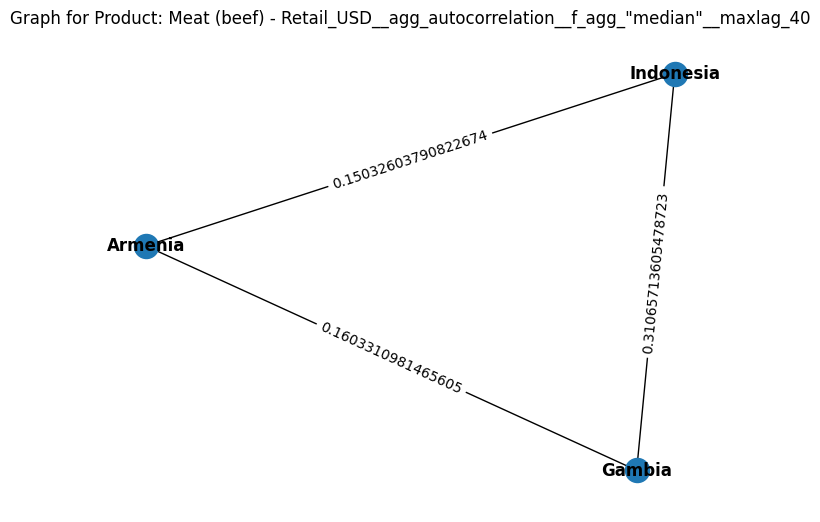

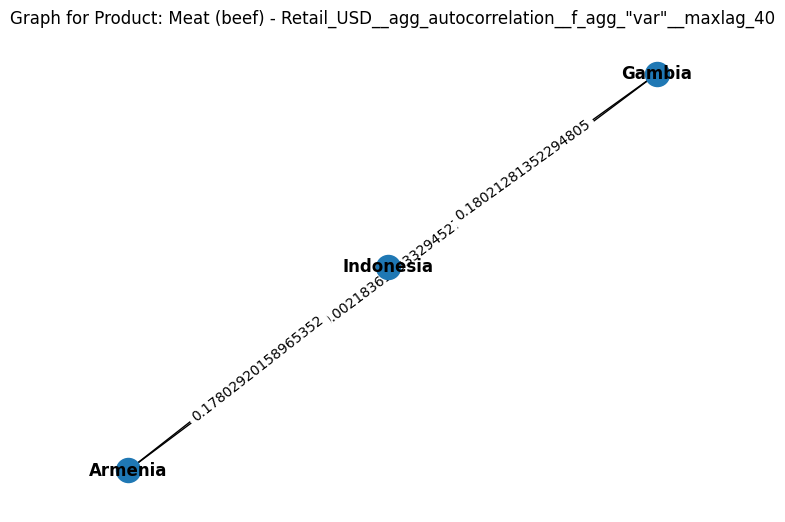

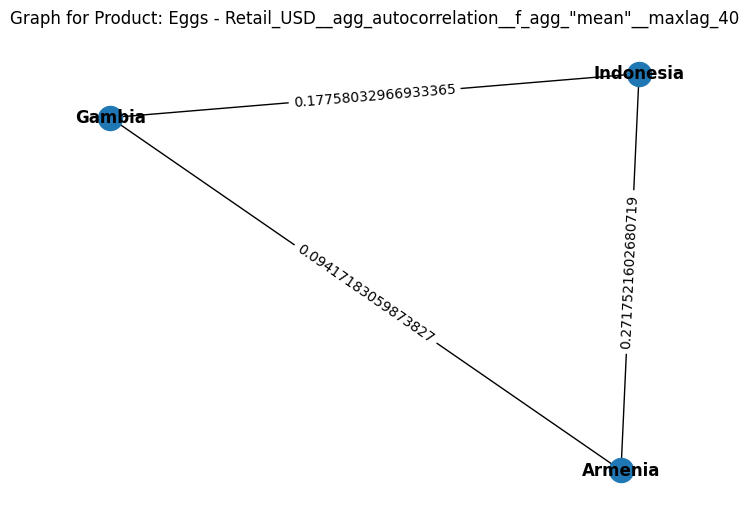

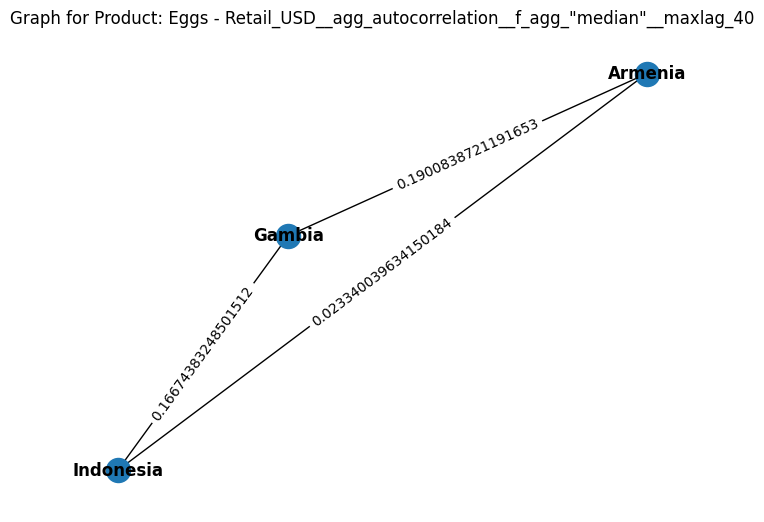

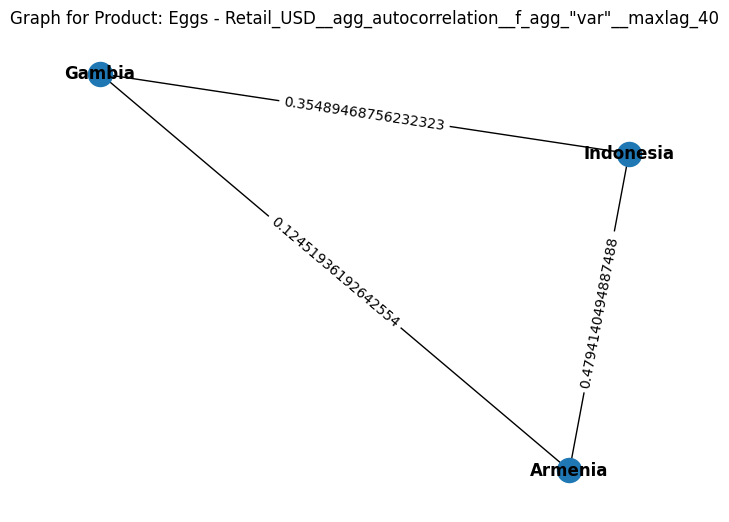

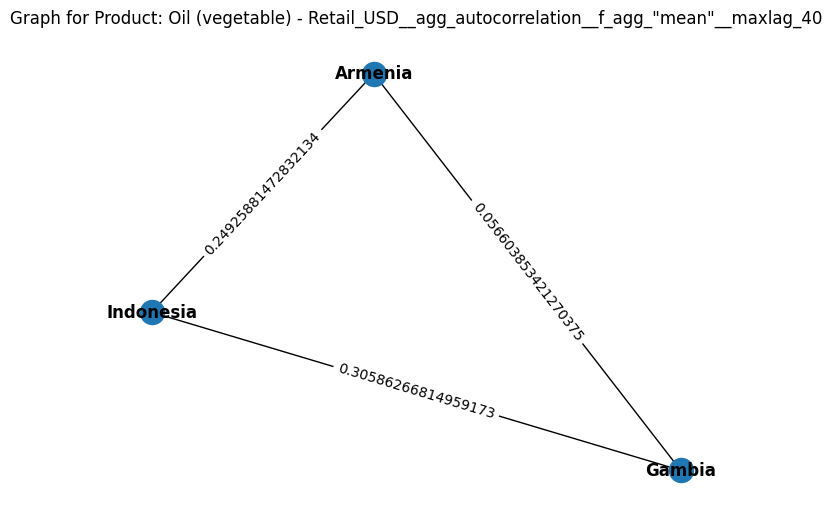

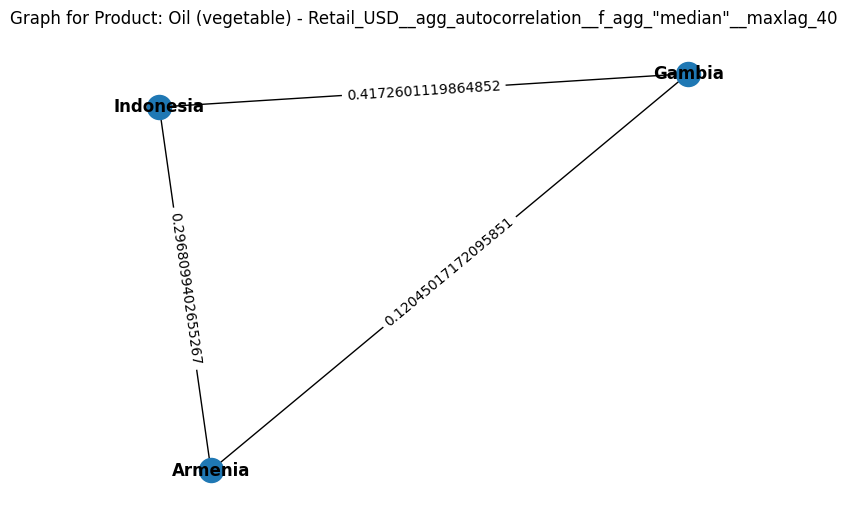

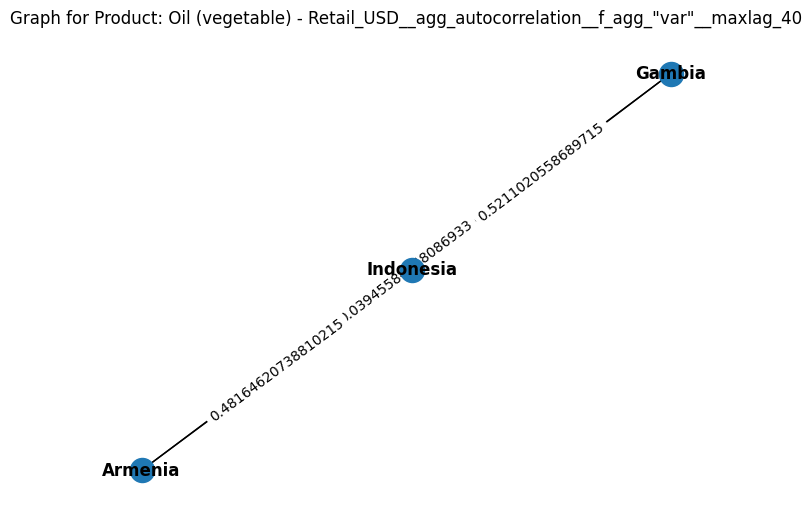

In [ ]:
# List of products (columns in the correlation matrix)
products = new_df.columns

# Create a graph for each product
for product in products:
    # Create a new graph
    G = nx.Graph()

    # Add nodes (countries)
    countries = new_df.index
    G.add_nodes_from(countries)

    # Calculate edges (difference in correlations)
    for country1 in countries:
        for country2 in countries:
            if country1 != country2:
                correlation_diff = abs(new_df.loc[country1, product] - new_df.loc[country2, product])
                G.add_edge(country1, country2, weight=correlation_diff)

    # Draw the graph
    pos = nx.spring_layout(G)  # Position nodes using spring layout
    nx.draw(G, pos, with_labels=True, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.title(f"Graph for Product: {product}")
    plt.show()

In [ ]:
#ova treba otkako kje gi enkodiram datumite kako DATES so pandas

def correlation_matrix111(df_original,columns_to_keep):

  # Create a new DataFrame with selected columns
  data = df_original[columns_to_keep].copy()
  # Sample data (replace this with your actual data)

  # Create a DataFrame
  df = data

  # Pivot the DataFrame
  pivot_df = df.pivot(index='Date', columns='Country', values='Product A price')

  # Calculate Pearson correlation
  correlation_matrix = pivot_df.corr()

  return correlation_matrix